# Urban Sound Classification - IBM Capstone Project

In [1]:
import keras
import librosa
import librosa.display
import matplotlib.pyplot as plt
from keras import layers
from keras import Sequential
from keras import activations
import ffmpeg

%matplotlib inline
import os
import pandas as pd
from glob import glob
import numpy as np

Using TensorFlow backend.


In [87]:
# This function is used to create melspectrogram of sound files present in training set and saves
# the images of melspectrograms in designated folder

def create_spectrogram(filename,name):
    name = name.split('.')[0]
    print(name)
    plt.interactive(False)
    fig = plt.figure(figsize=(10,10))
#    plt.figure(figsize=(100,100))
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    clip,sample_rate = librosa.load(filename,duration=5.0)
    s = librosa.feature.melspectrogram(y=clip,sr = sample_rate)
    librosa.display.specshow(s, sr=sample_rate, x_axis='time', y_axis='mel')
    filename = 'C:/Users/shaya/Desktop/urban_sound_images/train/' + name + '.jpg'
    
    plt.savefig(filename,dpi=50,bbox_inches='tight', pad_inches=0)
#    plt.show()
    fig.clf()
    plt.close()
    
    plt.close(fig)
    plt.close('all')

In [85]:
# This function is used to create melspectrogram of sound files present in test set and saves
# the images of melspectrograms in designated folder

def create_spectrogram_test(filename,name):
    name = name.split('.')[0]
    print(name)
    plt.interactive(False)
    fig = plt.figure(figsize=(10,10))
#    plt.figure(figsize=(100,100))
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    clip,sample_rate = librosa.load(filename,duration=5.0)
    s = librosa.feature.melspectrogram(y=clip,sr = sample_rate)
    librosa.display.specshow(s, sr=sample_rate, x_axis='time', y_axis='mel')
    filename = 'C:/Users/shaya/Desktop/urban_sound_images/test/' + name + '.jpg'
    plt.savefig(filename,dpi=400,bbox_inches='tight', pad_inches=0)
    
    plt.savefig(filename,dpi=50,bbox_inches='tight', pad_inches=0)
#    plt.show()
    fig.clf()
    plt.close()
    
    plt.close(fig)
    plt.close('all')

0


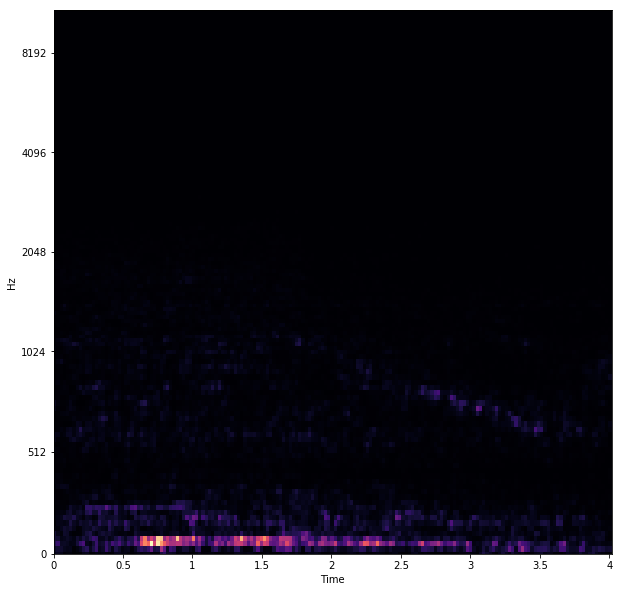

In [88]:
# This code is just to observe an image of melspectrogram of a sound file.

filename = 'C:/Users/shaya/Desktop/urban-sound-classification/train/Train/0.wav'
name = filename.split('/')[-1]
name = name.split('.')[0]
name
create_spectrogram('C:/Users/shaya/Desktop/urban-sound-classification/train/Train/0.wav',name)

In [ ]:
# This part of code simply saves the melspectrograms of all sound files present in training set in a folder

directory = 'C:/Users/shaya/Desktop/urban-sound-classification/train/Train/'
i = 0
for audio_name in os.listdir(directory):
    filename = directory+audio_name
#    print(directory+audio_name)
    
    create_spectrogram(filename,audio_name)
#    i+=1
#    if i == 10:
#        break

In [ ]:
# This part of code simply saves the melspectrograms of all sound files present in test set in a folder

directory = 'C:/Users/shaya/Desktop/urban-sound-classification/test/Test/'
i = 0
for audio_name in os.listdir(directory):
    filename = directory+audio_name
    #print(directory+audio_name)
    
    create_spectrogram_test(filename,audio_name)
#    i+=1
#    if i == 10:
#        break

In [21]:
# Here we read the train.csv and test.csv files

from keras_preprocessing.image import ImageDataGenerator
train_df = pd.read_csv('C:/Users/shaya/Desktop/urban-sound-classification/train/train.csv', dtype = str)
test_df = pd.read_csv('C:/Users/shaya/Desktop/urban-sound-classification/test/test.csv', dtype = str)

def append_ext(fn):
    return fn+".jpg"


train_df["ID"]=train_df["ID"].apply(append_ext)
test_df["ID"]=test_df["ID"].apply(append_ext)

datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

In [22]:
# These two generaters read images from directory and their names and class from CSV files.
# The images are converted to 64x64 size and taken in batches of 32 samples. 

train_generator=datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="C:/Users/shaya/Desktop/urban_sound_images/train/",
    x_col="ID",
    y_col="Class",
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

valid_generator=datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="C:/Users/shaya/Desktop/urban_sound_images/train/",
    x_col="ID",
    y_col="Class",
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

Found 4348 images belonging to 10 classes.
Found 1087 images belonging to 10 classes.


In [35]:
# Here we import functions necessary for Convolutional Neural Network

from keras.layers import Dropout,Activation,Flatten,Dense
from keras import optimizers
from keras.optimizers import sgd,adam
from keras.losses import categorical_crossentropy
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D
from keras.activations import relu,softmax


In [71]:
# We use Sequential neural network model with 2 2-D convolutional layers and 2 max pooling layers of size
# 3x3. We also use dropout to mitigate overfitting and finally a dense layer layer of 128 neurons and
# softmax layer to give outputs of 10 classes.

model = Sequential()
model.add(Conv2D(32,(3,3),activation = relu,padding='same',input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3),activation = relu, padding='same'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation=relu))
model.add(Dropout(0.5))
model.add(Dense(10,activation=softmax))
model.summary()
optimizer_adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 3136)              0         
__________

In [74]:
# We train our network for 120 EPOCHS and print the progress

train_steps = train_generator.n // train_generator.batch_size
validation_steps = valid_generator.n // valid_generator.batch_size
history = model.fit_generator(train_generator,steps_per_epoch = train_steps, validation_data=valid_generator, validation_steps=validation_steps,epochs = 120)
model.evaluate_generator(generator=valid_generator,steps = validation_steps)

Epoch 1/120
135/135 [==============================] - 10s 72ms/step - loss: 0.5157 - acc: 0.8208 - val_loss: 0.7077 - val_acc: 0.7687
Epoch 2/120
135/135 [==============================] - 9s 65ms/step - loss: 0.5320 - acc: 0.8124 - val_loss: 0.7010 - val_acc: 0.7630
Epoch 3/120
135/135 [==============================] - 9s 65ms/step - loss: 0.5047 - acc: 0.8281 - val_loss: 0.6877 - val_acc: 0.7744
Epoch 4/120
135/135 [==============================] - 9s 65ms/step - loss: 0.5077 - acc: 0.8253 - val_loss: 0.7732 - val_acc: 0.7820
Epoch 5/120
135/135 [==============================] - 9s 65ms/step - loss: 0.5068 - acc: 0.8229 - val_loss: 0.6980 - val_acc: 0.7810
Epoch 6/120
135/135 [==============================] - 9s 65ms/step - loss: 0.5152 - acc: 0.8245 - val_loss: 0.7344 - val_acc: 0.8028
Epoch 7/120
135/135 [==============================] - 9s 65ms/step - loss: 0.4880 - acc: 0.8382 - val_loss: 0.6536 - val_acc: 0.7943
Epoch 8/120
135/135 [==============================] - 9s 64m

Epoch 62/120
135/135 [==============================] - 9s 68ms/step - loss: 0.3554 - acc: 0.8796 - val_loss: 0.7467 - val_acc: 0.8000
Epoch 63/120
135/135 [==============================] - 9s 68ms/step - loss: 0.3746 - acc: 0.8693 - val_loss: 0.7436 - val_acc: 0.7905
Epoch 64/120
135/135 [==============================] - 9s 66ms/step - loss: 0.3643 - acc: 0.8793 - val_loss: 0.7323 - val_acc: 0.8009
Epoch 65/120
135/135 [==============================] - 9s 64ms/step - loss: 0.3837 - acc: 0.8665 - val_loss: 0.7321 - val_acc: 0.8028
Epoch 66/120
135/135 [==============================] - 9s 64ms/step - loss: 0.3965 - acc: 0.8580 - val_loss: 0.7471 - val_acc: 0.7896
Epoch 67/120
135/135 [==============================] - 9s 64ms/step - loss: 0.3663 - acc: 0.8768 - val_loss: 0.6878 - val_acc: 0.7981
Epoch 68/120
135/135 [==============================] - 9s 64ms/step - loss: 0.3675 - acc: 0.8756 - val_loss: 0.7490 - val_acc: 0.7848
Epoch 69/120
135/135 [==============================] -

[0.7816948871476955, 0.7933649281754878]

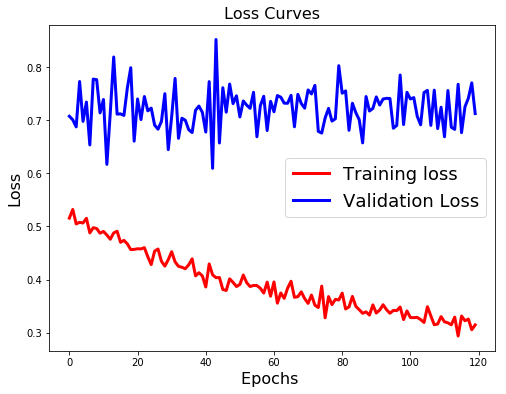

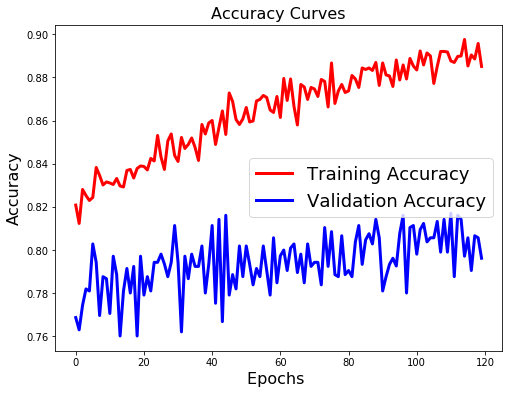

In [75]:
# This function plots the training and validation progress of our neural network model

import matplotlib.pyplot as plt
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()

In [77]:
# This function is used to generate test images to get prediction on them from neural network.

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory="C:/Users/shaya/Desktop/urban_sound_images/test/",
    x_col="ID",
    y_col=None,
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(64,64))
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 3297 images.


In [78]:
# Here we get the predictions of our test images. I have just shown class predictions of 6 sound files
# They all turned out to be correct.

test_generator.reset()
pred=model.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

#Fetch labels from train gen for testing
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predictions[0:6])

103/103 [==============================] - 6s 56ms/step
['drilling', 'children_playing', 'drilling', 'dog_bark', 'children_playing', 'jackhammer']


In [79]:
# This is just to show how train dataset looks like

train_df = pd.read_csv('C:/Users/shaya/Desktop/urban-sound-classification/train/train.csv')
train_df.head(5)

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [80]:
# This is just to show how test dataset looks like

test_df = pd.read_csv('C:/Users/shaya/Desktop/urban-sound-classification/test/test.csv')
test_df.head(5)

,ID
0,5
1,7
2,8
3,9
4,13
